In [48]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import shap

In [49]:
# load pre-trained model and data
model = ResNet50(weights='imagenet')
X, y = shap.datasets.imagenet50()

In [50]:
X.shape

(50, 224, 224, 3)

So these are 50 images

In [51]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

In [55]:
# python function to get model output; replace this function with your own model function. 
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# define a masker that is used to mask out partitions of the input image. 
masker = shap.maskers.Image("blur(128,128)", X[0].shape)

# create an explainer with model and image masker 
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=10, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]) 

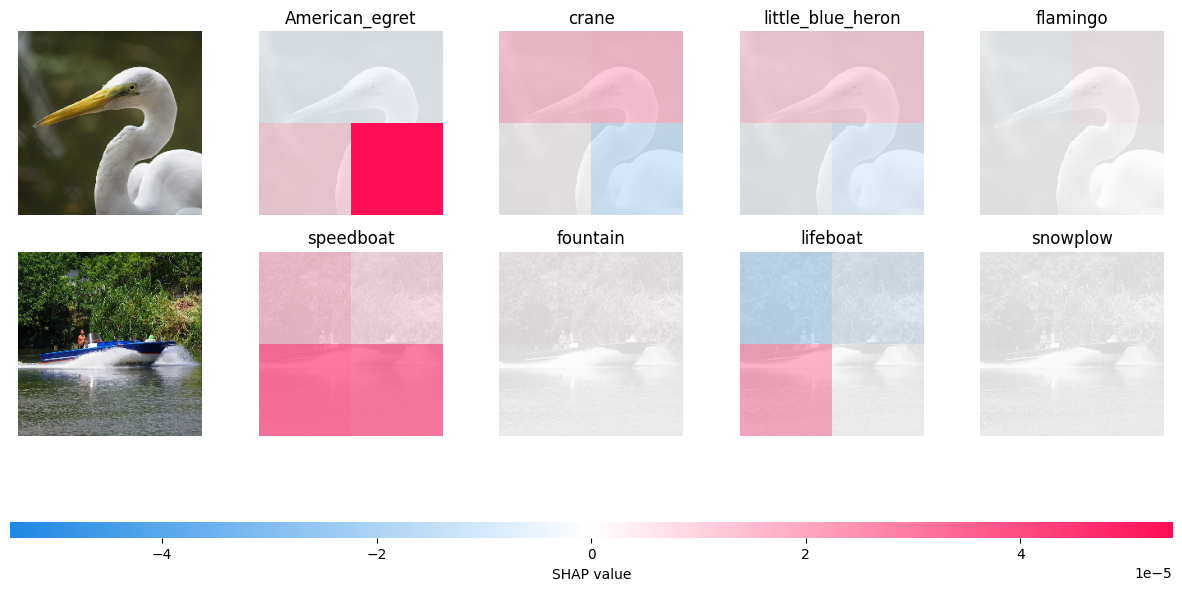

In [62]:
shap.image_plot(shap_values, pixel_values=X[1:3]/255)

The more evals, the more detailed the Partition explainer gets
